In [1]:
%pylab inline
from pyannote.core import notebook

Populating the interactive namespace from numpy and matplotlib


# Timeline (`pyannote.core.timeline.Timeline`)

In [2]:
from pyannote.core import Timeline

**`Timeline`** instances are used to describe sets of temporal fragments (e.g. of an audio file).  
One can optionally store an identifier of the associated multimedia document using **`uri`** keyword argument. 

In [3]:
timeline = Timeline(uri='MyAudioFile')

Temporal fragments can be added to the timeline in any order and may be overlapping.

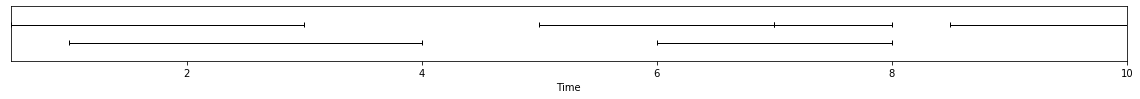

In [4]:
from pyannote.core import Segment
timeline.add(Segment(6, 8))
timeline.add(Segment(0.5, 3))
timeline.add(Segment(8.5, 10))
timeline.add(Segment(1, 4))
timeline.add(Segment(5, 7))
timeline.add(Segment(7, 8))

They are automatically sorted internally (by start time first).

In [5]:
for segment in timeline:
    print(segment)

[ 00:00:00.500 -->  00:00:03.000]
[ 00:00:01.000 -->  00:00:04.000]
[ 00:00:05.000 -->  00:00:07.000]
[ 00:00:06.000 -->  00:00:08.000]
[ 00:00:07.000 -->  00:00:08.000]
[ 00:00:08.500 -->  00:00:10.000]


In [6]:
print("Timeline contains %d segments" % len(timeline))
print("The second segment of timeline is %s" % (str(timeline[1])))

Timeline contains 6 segments
The second segment of timeline is [ 00:00:01.000 -->  00:00:04.000]


One can visualize **`Timeline`** instances in IPython Notebook.

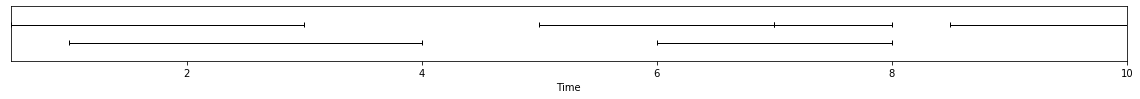

In [7]:
timeline

## Coverage, extent and gaps

The **extent** of a timeline is the segment of minimum duration that contains every segments of the timeline.

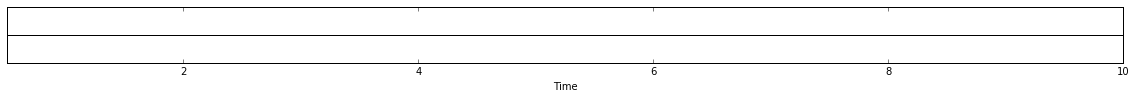

In [8]:
timeline.extent()

The **coverage** of a timeline is the timeline with the minimum number of segments with exactly the same time span as the original timeline.

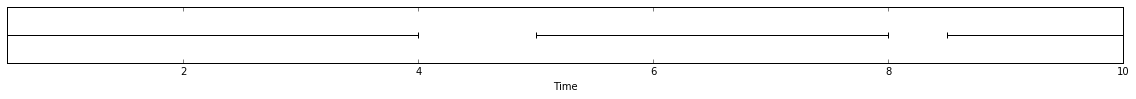

In [9]:
timeline.support()

One can also retrieve **gaps** in a timeline.

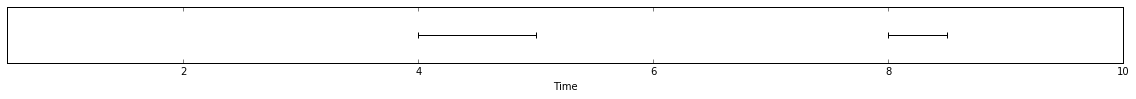

In [10]:
timeline.gaps()

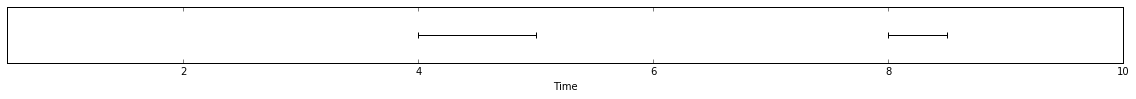

In [11]:
timeline.gaps(focus=Segment(0, 10.5))

## Cropping

Using the **crop** method, it is possible to select a subpart of timeline.

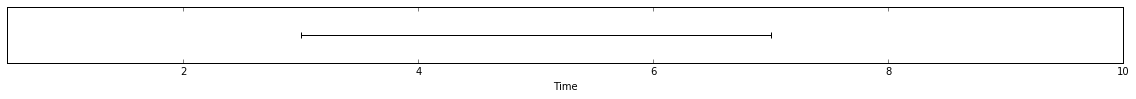

In [12]:
selection = Segment(3,7)
selection

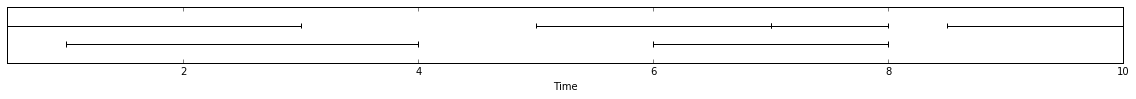

In [13]:
timeline

In **intersection** mode, segments are cut in half if needed.

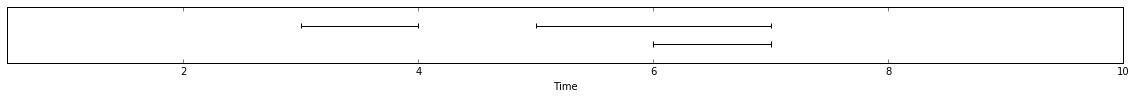

In [14]:
timeline.crop(selection, mode='intersection')

In **strict** mode, only segments fully included in selection are kept.

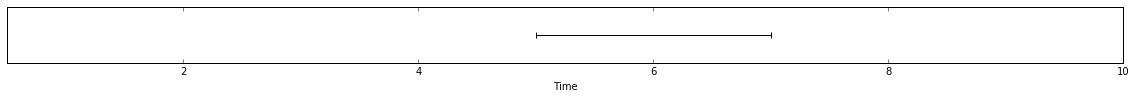

In [15]:
timeline.crop(selection, mode='strict')

In **loose** mode, any segment with a non-empty intersection is kept unchanged even though it starts before or end after the selection.

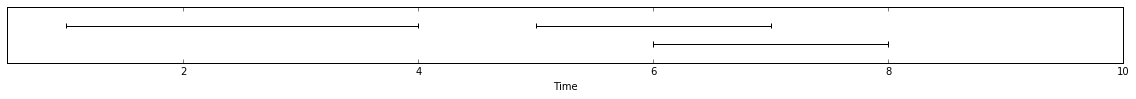

In [16]:
timeline.crop(selection, mode='loose')

## Union of timeline

The **update** (in place) and **union** (copy) methods can be used to combine two timelines.

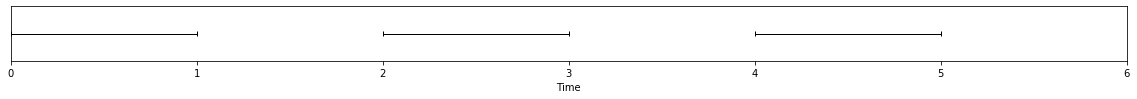

In [9]:
notebook.crop = Segment(0, 6)
first_timeline = Timeline([Segment(0, 1), Segment(2, 3), Segment(4, 5)])
first_timeline

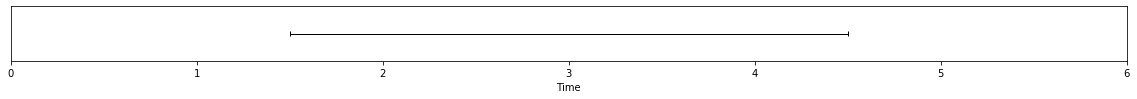

In [10]:
second_timeline = Timeline([Segment(1.5, 4.5)])
second_timeline

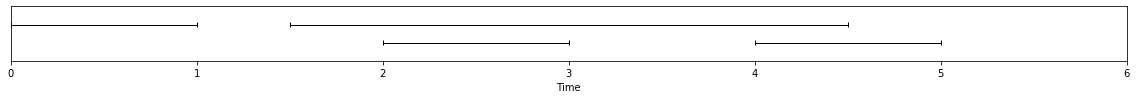

In [11]:
new_timeline = first_timeline.union(second_timeline)
new_timeline

## Intersection of timelines

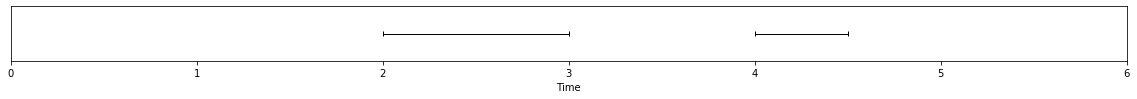

In [12]:
second_timeline.crop(first_timeline)

**co_iter** method allow to iterator over pairs of intersecting segments.

In [13]:
for s_first, s_second in first_timeline.co_iter(second_timeline):
    print(s_first, s_second)

[ 00:00:02.000 -->  00:00:03.000] [ 00:00:01.500 -->  00:00:04.500]
[ 00:00:04.000 -->  00:00:05.000] [ 00:00:01.500 -->  00:00:04.500]


## Need help?

You can always try the following...  
Who knows? It might give you the information you are looking for!

In [22]:
help(Timeline)

Help on class Timeline in module pyannote.core.timeline:

class Timeline(__builtin__.object)
 |  Ordered set of segments.
 |  
 |  A timeline can be seen as an ordered set of non-empty segments (Segment).
 |  Segments can overlap -- though adding an already exisiting segment to a
 |  timeline does nothing.
 |  
 |  Parameters
 |  ----------
 |  segments : Segment iterator, optional
 |      initial set of segments
 |  uri : string, optional
 |      name of segmented resource
 |  
 |  Returns
 |  -------
 |  timeline : Timeline
 |      New timeline
 |  
 |  Examples
 |  --------
 |  Create a new empty timeline
 |  
 |      >>> timeline = Timeline()
 |      >>> if not timeline:
 |      ...    print "Timeline is empty."
 |      Timeline is empty.
 |  
 |  Add one segment (+=)
 |  
 |      >>> segment = Segment(0, 1)
 |      >>> timeline.add(segment)
 |      >>> if len(timeline) == 1:
 |      ...    print "Timeline contains only one segment."
 |      Timeline contains only one segment.
 |  